## Question 1

**Study the numerical solution. Why does the flattening of the peak slow down with time?**


The flattening slows with time as the gradient of temperature decreases as more temperature is diffused. The gradient is what drives the diffusion in the first place as warmer water is diffused towards cooler water. When this gradient becomes smaller, the speed of the diffusion i.e the flattening of the peak slows down as the difference between the water temperatures reduces.

## Question 2

**Look for the comment #Question 2 in the code. This is a different type of boundary conditions called Neumann conditions (not to be mistaken with von Neumann). How would you describe them?**

N[0,n+1]  = N[1,n]
This first line states that the nitrogen gradient at the boundary on the left equals the nitrogen gradient at the adjacent interior point.

N[-1,n+1] = N[-2,n]
This second line states that the nitrogen gradient at the boundary on the right equals the nitrogen gradient at the adjacent interior point.

In total, the Neumann conditions assumes the derivative of the boundary condition instead of the value itself. The Neumann condtions do not assume that the boundary concentrations remain the same, they are considered as part of the changing system.

**Using the Dirichlet boundary conditions**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# constants
SECPERDAY = 86400.
M2KM = 1000

In [8]:
# problem parameters
kappa=1.0e3   # Eddy diffusion coefficient [m2 s-1]
dx=500         # X resolution [m]
dt=100         # time step [s]
t0=0.          # initial time
tmax=0.12      # duration of simulation [days]
xmax=10.0e3    # length of the basin [m]

# Parameters of the initial DIN spillage
N0 = 20.       # baseline concentration [mmol/m3]
sigma = 1000.  # width [m]
A = 100.       # amplitude [mmol/m3]

In [9]:
# Spatial shape of the initial DIN concentration
def Gaussian(x):
    y = N0+A*np.exp(-(x/sigma)**2)
    return y

In [10]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
N = np.zeros([IM,NT])   # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical diffusion DX^2/DT = ',dx**2/dt,' m2/s')
print('Physical diffusion = ',kappa,' m2/s')
print('Courant number (diffusion) = ',kappa*dt/(dx**2))

Grid steps :  40
Number of time steps :  104
Timestep =  100  s
Max numerical diffusion DX^2/DT =  2500.0  m2/s
Physical diffusion =  1000.0  m2/s
Courant number (diffusion) =  0.4


In [11]:
N[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 2
    N[0,n+1]  = N0
    N[-1,n+1] = N0
    # discretization of the second derivative
    rhs = kappa*(N[:-2,n]-2*N[1:-1,n]+N[2:,n])/(dx**2)
    N[1:-1,n+1] = N[1:-1,n] + rhs*dt 

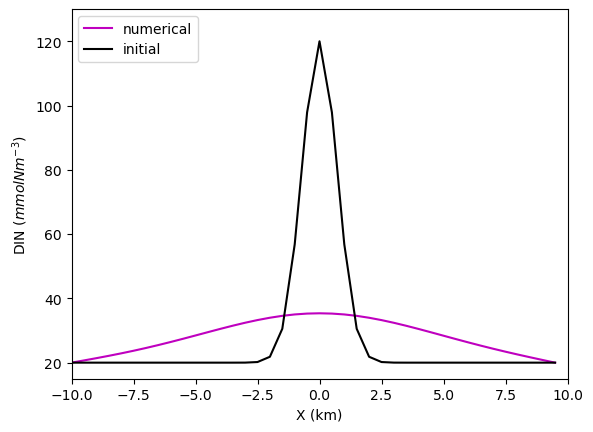

In [12]:
 fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/M2KM, xmax/M2KM, N0-5, N0+A+10])
# first plot the initial condition and set the line attributes
sol, = ax.plot(x/M2KM, N[:,0],'m',label='numerical')
line, = ax.plot(x/M2KM, Gaussian(x),'k',label='initial')
ax.set_xlabel('X (km)')
ax.set_ylabel('DIN ($mmol N m^{-3}$)')
plt.legend(loc='upper left')

def animate(i):
    sol.set_ydata(N[:,i])  # update the numerical solution
    return sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

**Why do you think the Neumann boundary conditions are more realistic?**

Neumann boundary conditions are more realistic because they account for the accumulation of nitrogen at the boundary. The Neumann plot continues to flatten when it reaches the boundary, with the edges even curling upwards as Nitrogen accumulates as the boundary. This does not happen with the Dirichlet conditions. Instead the concentration remains low despite there being a boundary preventing further spread out of the basin. This may be because the Neumann conditions assume the rate of change of Nitrogen instead of assuming that the concentration of Nitrogen will remain the same at the boundary which is unrealistic. 